<h1 align=center style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Fraud Detection
</font>
</h1>


<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
😊🎉 Classification 😊🎉 
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: left; line-height:200%; font-family:camtasia; font-size:medium">
<font face="camtasia" size=4>
Recently, a product sales organization has faced a problem: fraud with fake transactions!
It has been reported to the CEO of this institution that people have bought products using fake transactions, but no money has been entered into the institution's account. Due to the heavy volume of transactions and the inability to check them manually, the CEO quickly decides to implement a fraud detection system to prevent such incidents from happening. Therefore, we are requested to help this institution to implement this system
    
</font>
</p>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Import required libraries
    </font>
</h2>

In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve 

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Introducing the Dataset
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: left; line-height:200%; font-family:camtasia; font-size:medium">
<font face="camtasia" size=3>
Since the features of the transactions in the main data set of the institution were very large, first, using the dimensionality reduction method, the number of features was reduced and relatively cleaned data was provided as shown below. The following data of the institution's transactions within two days are tagged. The description of each column is given below
</font>
</p>

<center>
<div dir=rtl style="line-height:200%;font-family:camtasia;font-size:medium">
<font face="camtasia" size=3>
    
|Description|Feature|
|:------:|:---:|
|This feature includes the time interval between each transaction in the dataset and its unit in seconds|<code>Time</code>|
|It is equal to the amount of the corresponding transaction|<code>Amount</code>|
|Features obtained using dimension reduction method|<code>V1, V2 … V28</code>|
|Determining whether a transaction is fake or real. If it is one, it means that the transaction was fake, and if its value is zero, the transaction is healthy|<code>Class</code>|
    
</font>
</div>
</center>

<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Reading the Dataset
</font>
</h2>

In [2]:
train = pd.read_csv('fraud_train.csv')
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,8365.0,-0.655093,1.102283,1.610914,2.542440,0.928295,0.344427,0.340831,-0.004130,-0.039325,...,0.025710,0.297263,-0.195074,-0.476353,-0.269339,0.154728,-0.004028,0.155044,16.93,0.0
1,10222.0,-0.643681,0.953126,2.223666,1.134587,-0.198051,0.435065,0.221857,0.017773,1.931767,...,-0.066355,0.684519,-0.210179,0.036703,-0.126450,-0.199370,0.377610,0.033734,20.24,0.0
2,35866.0,-2.044489,3.368306,-3.937111,5.623120,-3.079232,-1.253474,-5.778880,1.707428,-4.467103,...,1.483594,0.834311,-0.148486,0.001669,-0.038996,0.389526,1.300236,0.549940,7.61,1.0
3,10836.0,1.020913,-0.400279,0.662579,0.341929,-0.656141,-0.021927,-0.386604,0.054592,1.820545,...,-0.131286,-0.065529,-0.067101,0.260703,0.253718,1.066000,-0.096361,-0.005774,79.95,0.0
4,69.0,0.298503,2.142722,-1.542143,1.561332,0.938108,-2.145673,1.405569,-0.778459,0.328636,...,-0.290987,-0.000235,0.092174,0.586205,-0.397314,-0.480949,0.251145,-0.242279,0.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,5838.0,-1.494748,1.374609,1.739505,-0.404363,0.337228,-0.353954,0.564640,0.103308,0.928487,...,-0.366262,-0.806897,-0.032148,0.084964,0.148915,-0.015621,0.064359,0.193122,5.99,0.0
7836,11005.0,1.308485,0.069616,0.545896,0.115439,-0.312410,-0.324753,-0.373901,-0.216854,1.610789,...,-0.108423,0.013710,-0.132407,-0.392797,0.360448,1.078788,-0.082476,-0.000158,14.95,0.0
7837,8827.0,-1.746494,-0.022183,1.700978,-3.494827,-0.538017,-0.800348,-0.106467,0.517637,2.786295,...,0.152429,0.571973,-0.334028,-0.019782,0.949107,-0.907445,0.167863,-0.020605,74.11,0.0
7838,2097.0,-0.612088,0.568390,1.207450,-2.126447,0.378698,-0.712041,0.776533,0.027359,0.202120,...,0.217032,0.676543,-0.324870,0.030754,0.271729,-0.752923,0.126115,0.097501,1.00,0.0


In [ ]:
Y= train['Class']
X= train.drop(columns=['Class'])
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, shuffle=True)

# feature scaling
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.transform(X_test)



<h2 align=left style="line-height:200%;font-family:camtasia;color:#0099cc">
<font face="camtasia" color="#0099cc">
Modeling and Evaluating
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align:left justify; line-height:200%; font-family:camtasia; font-size:medium">
<font face="camtasia" size=3>
it's time to train a model that can predict the target variable for this problem </font>
</p>

In [3]:
# Define a list of classifiers to use
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    KNeighborsClassifier()
]

# Define the parameter grid for each classifier
param_grids = [
    {'C': [0.1, 1, 10]},
    {'max_depth': [3, 5, 7]},
    {'n_estimators': [50, 100, 200]},
    {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    {'n_estimators': [50, 100, 200]},
    {'n_estimators': [50, 100, 200], 'learning_rate': [0.1, 0.5, 1.0]},
    {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
]

# Loop through each classifier and perform a grid search
for i, classifier in enumerate(classifiers):

    
    param_grid = param_grids[i]
    grid_search = GridSearchCV(classifier, param_grid, cv=5)
    grid_search.fit(scaled_x_train,y_train)
    print(f"{classifier.__class__.__name__} - Best parameters: {grid_search.best_params_}, Best score: {grid_search.best_score_}")

LogisticRegression - Best parameters: {'C': 10}, Best score: 0.9992029330842499
DecisionTreeClassifier - Best parameters: {'max_depth': 3}, Best score: 1.0


KeyboardInterrupt: 

LogisticRegression(C=10) - Accuracy: 1.00
LogisticRegression(C=10) - Precision: 1.00
LogisticRegression(C=10) - Recall: 1.00
LogisticRegression(C=10) - F1 Score: 1.00


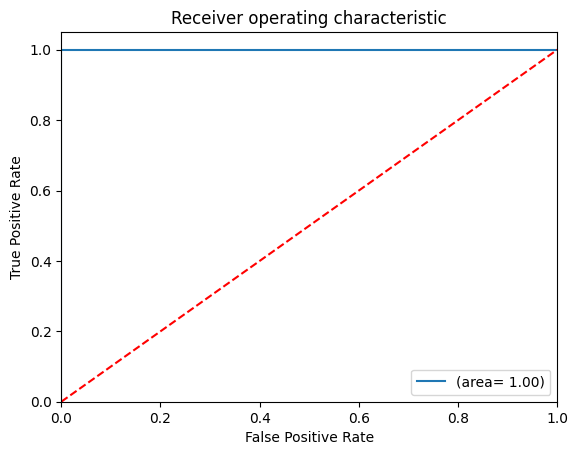

DecisionTreeClassifier(max_depth=3) - Accuracy: 1.00
DecisionTreeClassifier(max_depth=3) - Precision: 1.00
DecisionTreeClassifier(max_depth=3) - Recall: 0.99
DecisionTreeClassifier(max_depth=3) - F1 Score: 0.99


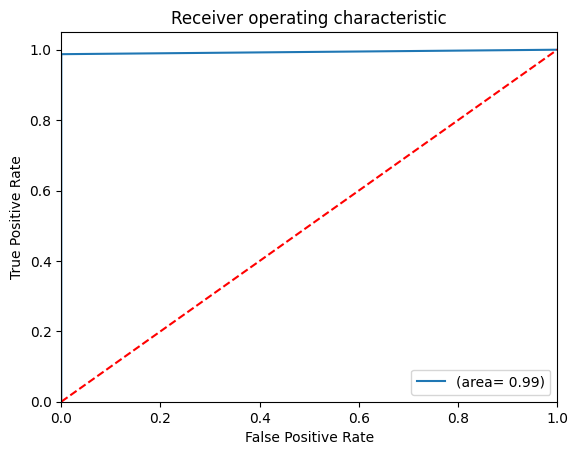

RandomForestClassifier() - Accuracy: 1.00
RandomForestClassifier() - Precision: 0.97
RandomForestClassifier() - Recall: 0.99
RandomForestClassifier() - F1 Score: 0.98


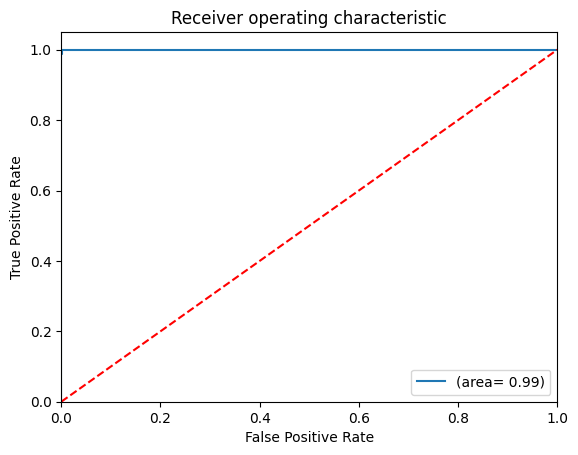

SVC(C=0.1, kernel='linear', probability=True) - Accuracy: 1.00
SVC(C=0.1, kernel='linear', probability=True) - Precision: 0.98
SVC(C=0.1, kernel='linear', probability=True) - Recall: 1.00
SVC(C=0.1, kernel='linear', probability=True) - F1 Score: 0.99


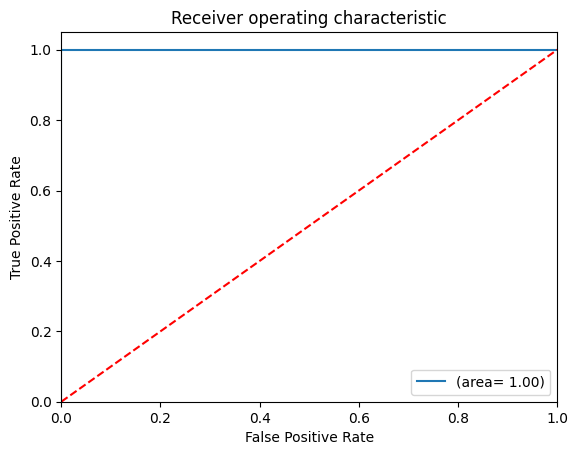

AdaBoostClassifier(n_estimators=200) - Accuracy: 1.00
AdaBoostClassifier(n_estimators=200) - Precision: 0.99
AdaBoostClassifier(n_estimators=200) - Recall: 0.99
AdaBoostClassifier(n_estimators=200) - F1 Score: 0.99


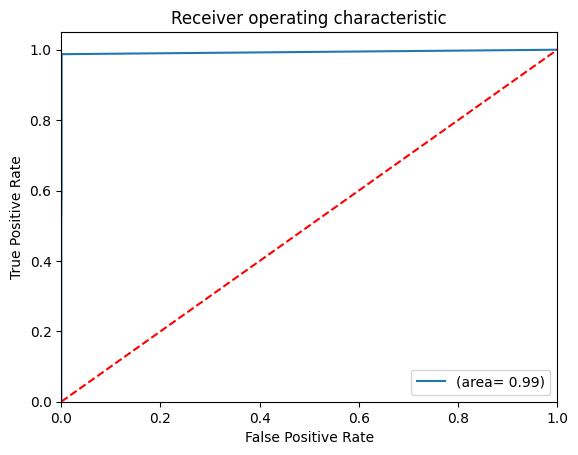

GradientBoostingClassifier(n_estimators=5) - Accuracy: 1.00
GradientBoostingClassifier(n_estimators=5) - Precision: 1.00
GradientBoostingClassifier(n_estimators=5) - Recall: 0.99
GradientBoostingClassifier(n_estimators=5) - F1 Score: 0.99


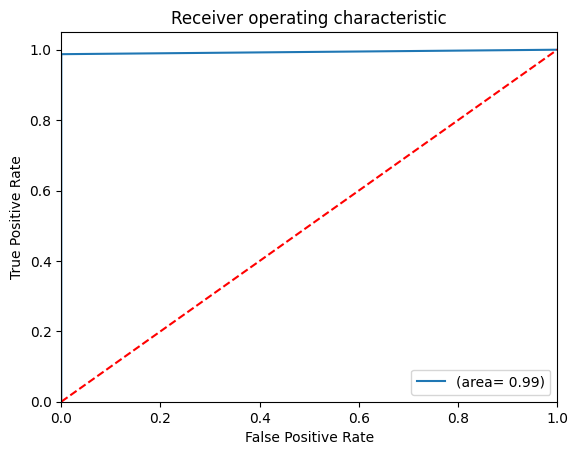

KNeighborsClassifier(n_neighbors=3, weights='distance') - Accuracy: 1.00
KNeighborsClassifier(n_neighbors=3, weights='distance') - Precision: 0.99
KNeighborsClassifier(n_neighbors=3, weights='distance') - Recall: 0.95
KNeighborsClassifier(n_neighbors=3, weights='distance') - F1 Score: 0.97


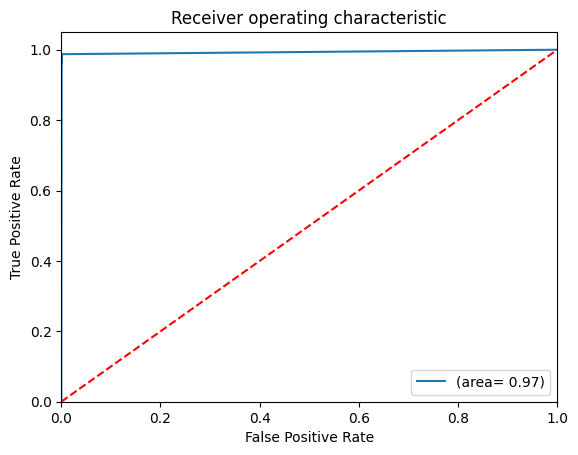

In [23]:
# Define a list of classifiers to use
classifiers = [
    LogisticRegression(C= 10),
    DecisionTreeClassifier(max_depth= 3),
    RandomForestClassifier(n_estimators= 100),
    SVC(C= 0.1, kernel= 'linear', probability=True),
    AdaBoostClassifier(n_estimators= 200),
    GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 5),
    KNeighborsClassifier(n_neighbors= 3, weights='distance')
]

# Loop through each classifier and fit it to the training data
for classifier in classifiers:
    classifier.fit(scaled_x_train, y_train)
    y_pred = classifier.predict(scaled_x_test)

    # Calculate and print the evaluation metrics
    print(f'{classifier} - Accuracy: {accuracy_score(y_test, y_pred):.2f}')
    print(f'{classifier} - Precision: {precision_score(y_test, y_pred):.2f}')
    print(f'{classifier} - Recall: {recall_score(y_test, y_pred):.2f}')
    print(f'{classifier} - F1 Score: {f1_score(y_test, y_pred):.2f}')
    roc_auc = roc_auc_score(y_test, classifier.predict(scaled_x_test))
    fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(scaled_x_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='(area= %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()